### Resnet18

C:\Users\Fatim_Sproj\AppData\Local\Temp\ipykernel_18624\671256850.py:139: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.Rectangle((0, 0), 1, 1, color=COLOR_BASE, edgecolor=EDGE_COLOR,
C:\Users\Fatim_Sproj\AppData\Local\Temp\ipykernel_18624\671256850.py:141: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.Rectangle((0, 0), 1, 1, color=COLOR_LODO, edgecolor=EDGE_COLOR,


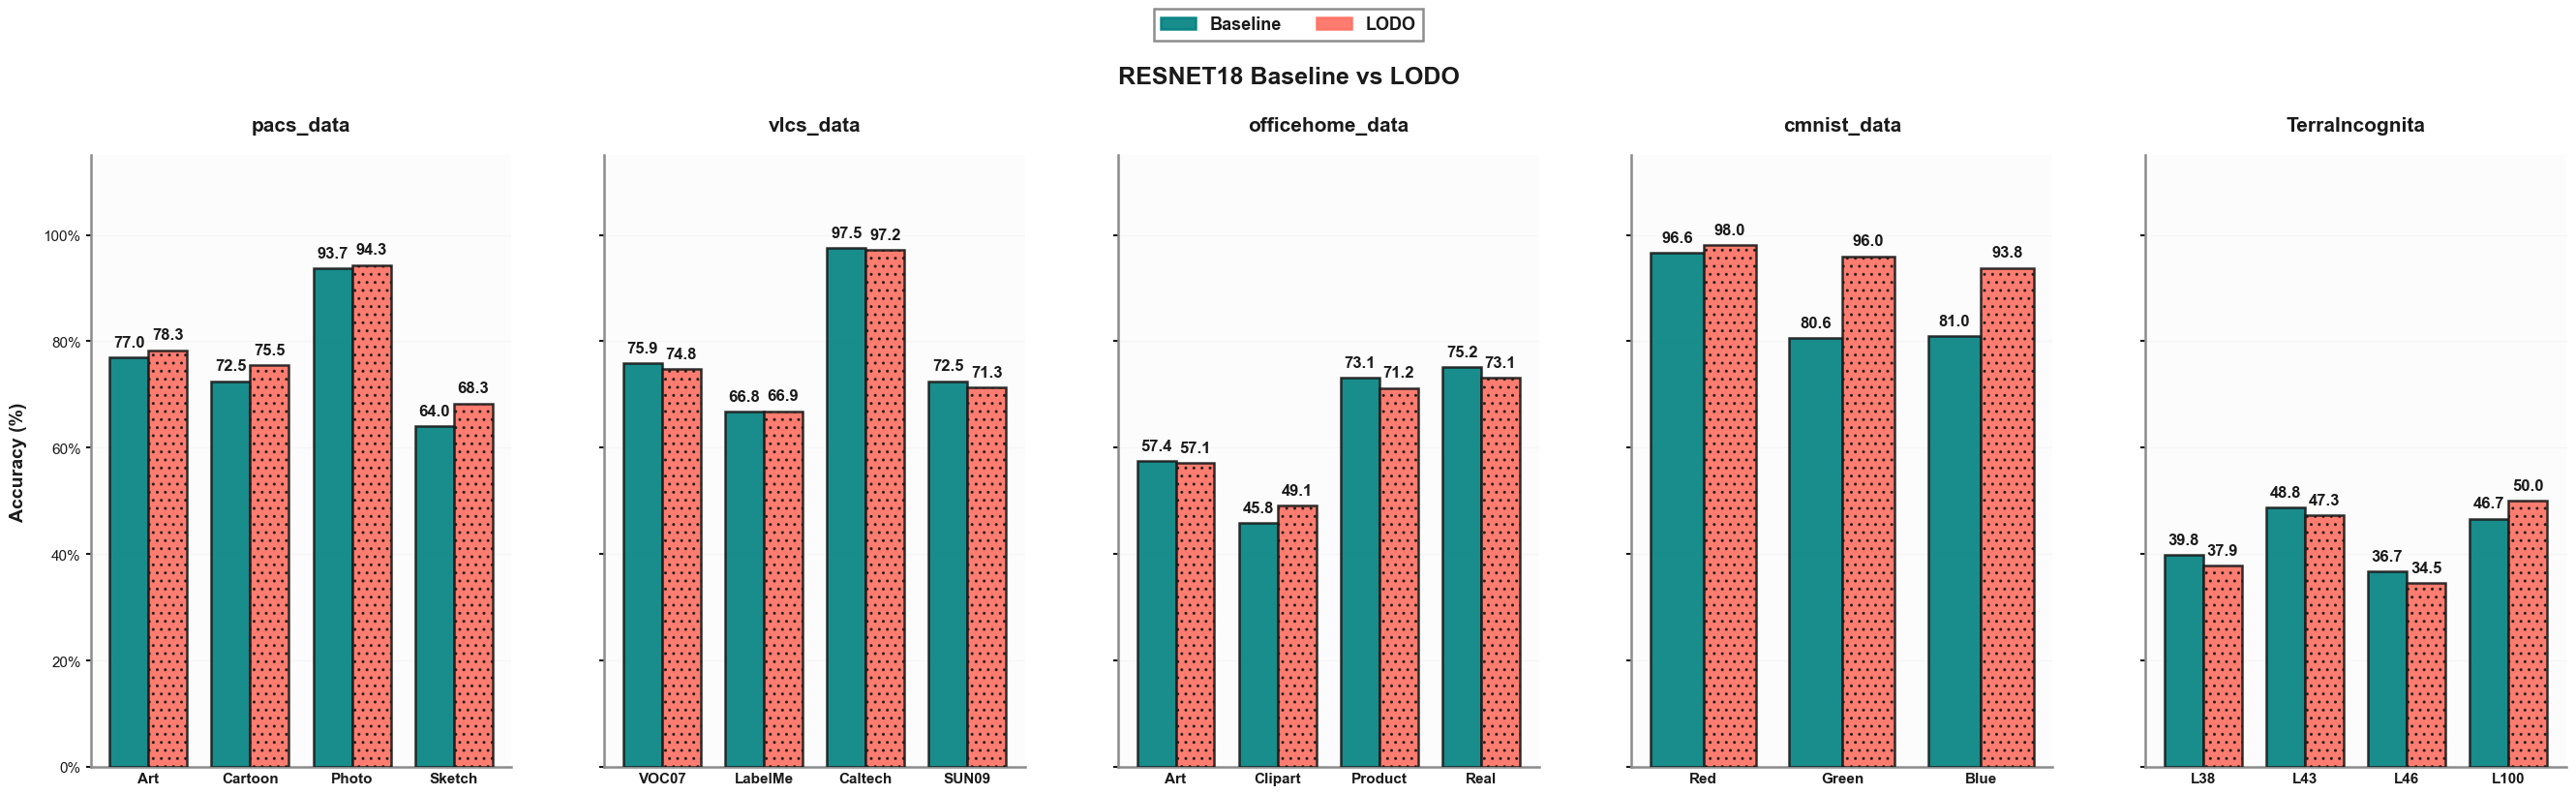

✓ C:\Users\Fatim_Sproj\Desktop\Fatim\Spring 2025\sproj\Visual-Reasoning\Vit-GRQO\plots\resnet18_domain_comparison.png


In [16]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

model_name = "resnet18"
out_dir = Path("plots")
out_dir.mkdir(parents=True, exist_ok=True)

datasets = {
    "pacs_data" : {
    "lodo_results": {"art_painting": 0.7831207065750736, "cartoon": 0.7546928327645052, "photo": 0.9431137724550899, "sketch": 0.6833799949096462},
    "baseline_results": {"art_painting": 0.7699, "cartoon": 0.7253, "photo": 0.9365, "sketch": 0.6399}
    },
    "vlcs_data" : {
    "lodo_results": {"VOC2007": 0.7482227488151659, "LabelMe": 0.6686746987951807, "Caltech101": 0.9717314487632509, "SUN09": 0.7126751980499695},
    "baseline_results": {"VOC2007": 0.7586, "LabelMe": 0.6679, "Caltech101": 0.9753, "SUN09": 0.7252}
    },
    "officehome_data": {
    "lodo_results": {"Art": 0.5714874330449115, "Clipart": 0.49095074455899196, "Product": 0.7120973192160397, "Real World": 0.7314666054624742},
    "baseline_results": {"Art": 0.5744, "Clipart": 0.4584, "Product": 0.7312, "Real World": 0.7519}
    },
    "cmnist_data" : {
    "lodo_results": {"red": 0.9801366597807087, "green": 0.9595687331536388, "blue": 0.9376102646351243},
    "baseline_results": {"red": 0.9660, "green": 0.8059, "blue": 0.8096}
    },
    "TerraIncognita": {
        "lodo_results": {"location_38": 0.3785, "location_43": 0.4734, "location_46": 0.3451, "location_100": 0.5001},
        "baseline_results": {"location_38": 0.3980, "location_43": 0.4878, "location_46": 0.3670, "location_100": 0.4669}
    }
}

def format_domain_name(name):
    replacements = {
        "art_painting": "Art",
        "cartoon": "Cartoon",
        "photo": "Photo",
        "sketch": "Sketch",
        "VOC2007": "VOC07",
        "LabelMe": "LabelMe",
        "Caltech101": "Caltech",
        "SUN09": "SUN09",
        "Art": "Art",
        "Clipart": "Clipart",
        "Product": "Product",
        "Real World": "Real",
        "red": "Red",
        "green": "Green",
        "blue": "Blue",
        "location_38": "L38",
        "location_43": "L43",
        "location_46": "L46",
        "location_100": "L100"
    }
    return replacements.get(name, name)

# Elegant dark color scheme - sophisticated and modern
COLOR_BASE = "#008080"    # Deep slate blue
COLOR_LODO = "#FF6F61"    # Rich coral red
EDGE_COLOR = "#1a1a1a"    # True black
TEXT_COLOR = "#1a1a1a"    # Black for text
GRID_COLOR = "#d5d5d5"    # Light gray

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Helvetica', 'DejaVu Sans']

n = len(datasets)
fig, axes = plt.subplots(1, n, figsize=(5.5 * n, 8), sharey=True)
if n == 1:
    axes = [axes]

for ax, (dataset_name, data) in zip(axes, datasets.items()):
    domains = list(data["lodo_results"].keys())
    baseline_vals = np.array([data["baseline_results"][k] for k in domains])
    lodo_vals = np.array([data["lodo_results"][k] for k in domains])

    x = np.arange(len(domains))
    width = 0.38
    import matplotlib.colors as mcolors
    # Create bars with elegant dark colors
    lighter_base = mcolors.to_rgba(COLOR_BASE, 0.8)
    lighter_lodo = mcolors.to_rgba(COLOR_LODO, 0.8)

    bars_b = ax.bar(x - width/2, baseline_vals, width,
                color=COLOR_BASE, edgecolor=EDGE_COLOR,
                linewidth=1.8, alpha=0.9, hatch='', zorder=3)

    bars_l = ax.bar(x + width/2, lodo_vals, width,
                    color=COLOR_LODO, edgecolor=EDGE_COLOR,
                    linewidth=1.8, alpha=0.9, hatch='..', zorder=3)

    # Add clean labels ON TOP - just numbers, no percent symbols
    for bars in [bars_b, bars_l]:
        for bar in bars:
            h = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2, h + 0.015, 
                   f'{h*100:.1f}', ha='center', va='bottom', 
                   fontsize=12, fontweight='bold', color=TEXT_COLOR)

    # Dataset title
    ax.set_title(dataset_name, fontsize=15, fontweight='bold', 
                pad=18, color=TEXT_COLOR)
    
    # X-axis labels
    ax.set_xticks(x)
    ax.set_xticklabels([format_domain_name(d) for d in domains], 
                       fontsize=11, fontweight='600', color=TEXT_COLOR)
    
    # Y-axis range with padding for labels
    ax.set_ylim(0, 1.15)
    
    # Minimal grid
    ax.grid(axis='y', linestyle='-', alpha=0.15, color=GRID_COLOR, 
            linewidth=0.8, zorder=0)
    ax.set_axisbelow(True)
    ax.set_facecolor('#FCFCFC')
    
    # Clean spines
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)
    for spine in ['left', 'bottom']:
        ax.spines[spine].set_linewidth(1.8)
        ax.spines[spine].set_color('#8B8B8B')
    
    # Y-axis formatting - showing percentage
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{int(y*100)}%'))
    ax.tick_params(axis='y', labelsize=11, colors=TEXT_COLOR, width=1.5)
    ax.tick_params(axis='x', length=0)

# Y-axis label
axes[0].set_ylabel("Accuracy (%)", fontsize=14, fontweight='bold', 
                   color=TEXT_COLOR, labelpad=12)

# Main title
fig.suptitle(f'{model_name.upper()} Baseline vs LODO', 
            fontsize=18, fontweight='bold', y=0.985, color=TEXT_COLOR)

# Legend - elegant and simple
handles = [
    plt.Rectangle((0, 0), 1, 1, color=COLOR_BASE, edgecolor=EDGE_COLOR, 
                  alpha=0.9, linewidth=1.8),
    plt.Rectangle((0, 0), 1, 1, color=COLOR_LODO, edgecolor=EDGE_COLOR, 
                  alpha=0.9, linewidth=1.8)
]
legend = fig.legend(handles, ['Baseline', 'LODO'], 
                   loc='upper center', ncol=2, frameon=True, 
                   fontsize=13, bbox_to_anchor=(0.5, 1.07),
                   framealpha=0.98, edgecolor='#8B8B8B', fancybox=False)
legend.get_frame().set_linewidth(1.8)

for text in legend.get_texts():
    text.set_fontweight('bold')
    text.set_color(TEXT_COLOR)

plt.subplots_adjust(top=0.87, left=0.05, right=0.98, bottom=0.08, wspace=0.22)
plt.show()
# # Save files
png_path = out_dir / f"{model_name}_domain_comparison.png"
# # pdf_path = out_dir / f"{model_name}_domain_comparison_clean.pdf"
# # svg_path = out_dir / f"{model_name}_domain_comparison_clean.svg"

fig.savefig(png_path, dpi=300, bbox_inches='tight', facecolor='white')
# # fig.savefig(pdf_path, bbox_inches='tight', facecolor='white')
# # fig.savefig(svg_path, bbox_inches='tight', facecolor='white')
# plt.close(fig)

print(f"✓ {png_path.resolve()}")
# print(f"✓ {pdf_path.resolve()}")
# print(f"✓ {svg_path.resolve()}")

### vit tiny

C:\Users\Fatim_Sproj\AppData\Local\Temp\ipykernel_18624\642537288.py:140: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.Rectangle((0, 0), 1, 1, color=COLOR_BASE, edgecolor=EDGE_COLOR,
C:\Users\Fatim_Sproj\AppData\Local\Temp\ipykernel_18624\642537288.py:142: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.Rectangle((0, 0), 1, 1, color=COLOR_LODO, edgecolor=EDGE_COLOR,


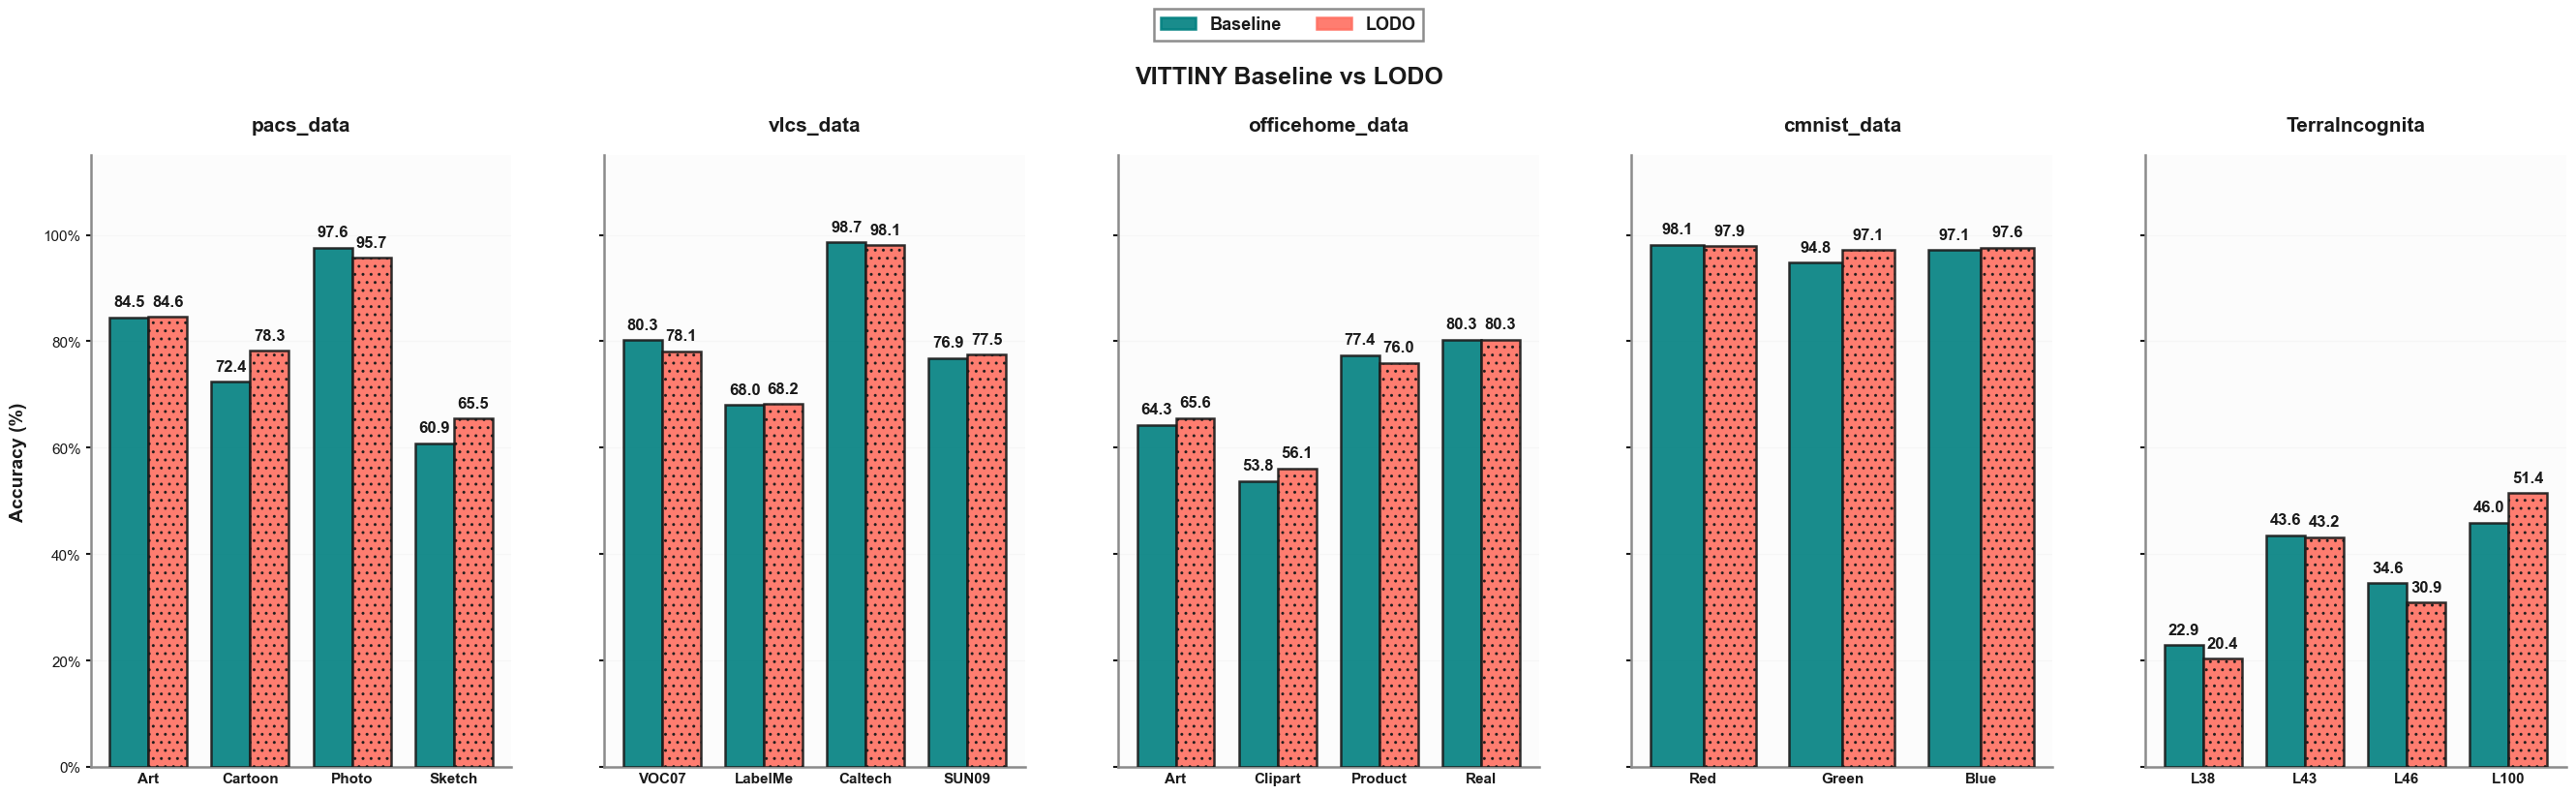

✓ C:\Users\Fatim_Sproj\Desktop\Fatim\Spring 2025\sproj\Visual-Reasoning\Vit-GRQO\plots\vittiny_domain_comparison.png


In [15]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

model_name = "vittiny"
out_dir = Path("plots")
out_dir.mkdir(parents=True, exist_ok=True)

datasets = {
    "pacs_data": {
        "lodo_results": {"art_painting": 0.8464, "cartoon": 0.7828, "photo": 0.9569, "sketch": 0.6554},
        "baseline_results": {"art_painting": 0.8449, "cartoon": 0.7244, "photo": 0.9760, "sketch": 0.6088}
    },
    "vlcs_data": {
        "lodo_results": {"VOC2007": 0.7814, "LabelMe": 0.6822, "Caltech101": 0.9809, "SUN09": 0.7751},
        "baseline_results": {"VOC2007": 0.8027, "LabelMe": 0.6803, "Caltech101": 0.9866, "SUN09": 0.7690}
    },
    "officehome_data": {
        "lodo_results": {"Art": 0.6560, "Clipart": 0.5611, "Product": 0.7596, "Real World": 0.8033},
        "baseline_results": {"Art": 0.6428, "Clipart": 0.5375, "Product": 0.7740, "Real World": 0.8033}
    },
    "cmnist_data": {
        "lodo_results": {"red": 0.9792, "green": 0.9711, "blue": 0.9758},
        "baseline_results": {"red": 0.9814, "green": 0.9482, "blue": 0.9713}
    },
    "TerraIncognita": {
        "lodo_results": {"location_38": 0.2042, "location_43": 0.4318, "location_46": 0.3090, "location_100": 0.5144},
        "baseline_results": {"location_38": 0.2290, "location_43": 0.4356, "location_46": 0.3458, "location_100": 0.4595}
    }
}


def format_domain_name(name):
    replacements = {
        "art_painting": "Art",
        "cartoon": "Cartoon",
        "photo": "Photo",
        "sketch": "Sketch",
        "VOC2007": "VOC07",
        "LabelMe": "LabelMe",
        "Caltech101": "Caltech",
        "SUN09": "SUN09",
        "Art": "Art",
        "Clipart": "Clipart",
        "Product": "Product",
        "Real World": "Real",
        "red": "Red",
        "green": "Green",
        "blue": "Blue",
        "location_38": "L38",
        "location_43": "L43",
        "location_46": "L46",
        "location_100": "L100"
    }
    return replacements.get(name, name)

# Elegant dark color scheme - sophisticated and modern
COLOR_BASE = "#008080"    # Deep slate blue
COLOR_LODO = "#FF6F61"    # Rich coral red
EDGE_COLOR = "#1a1a1a"    # True black
TEXT_COLOR = "#1a1a1a"    # Black for text
GRID_COLOR = "#d5d5d5"    # Light gray

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Helvetica', 'DejaVu Sans']

n = len(datasets)
fig, axes = plt.subplots(1, n, figsize=(5.5 * n, 8), sharey=True)
if n == 1:
    axes = [axes]

for ax, (dataset_name, data) in zip(axes, datasets.items()):
    domains = list(data["lodo_results"].keys())
    baseline_vals = np.array([data["baseline_results"][k] for k in domains])
    lodo_vals = np.array([data["lodo_results"][k] for k in domains])

    x = np.arange(len(domains))
    width = 0.38
    import matplotlib.colors as mcolors
    # Create bars with elegant dark colors
    lighter_base = mcolors.to_rgba(COLOR_BASE, 0.8)
    lighter_lodo = mcolors.to_rgba(COLOR_LODO, 0.8)

    bars_b = ax.bar(x - width/2, baseline_vals, width,
                color=COLOR_BASE, edgecolor=EDGE_COLOR,
                linewidth=1.8, alpha=0.9, hatch='', zorder=3)

    bars_l = ax.bar(x + width/2, lodo_vals, width,
                    color=COLOR_LODO, edgecolor=EDGE_COLOR,
                    linewidth=1.8, alpha=0.9, hatch='..', zorder=3)

    # Add clean labels ON TOP - just numbers, no percent symbols
    for bars in [bars_b, bars_l]:
        for bar in bars:
            h = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2, h + 0.015, 
                   f'{h*100:.1f}', ha='center', va='bottom', 
                   fontsize=12, fontweight='bold', color=TEXT_COLOR)

    # Dataset title
    ax.set_title(dataset_name, fontsize=15, fontweight='bold', 
                pad=18, color=TEXT_COLOR)
    
    # X-axis labels
    ax.set_xticks(x)
    ax.set_xticklabels([format_domain_name(d) for d in domains], 
                       fontsize=11, fontweight='600', color=TEXT_COLOR)
    
    # Y-axis range with padding for labels
    ax.set_ylim(0, 1.15)
    
    # Minimal grid
    ax.grid(axis='y', linestyle='-', alpha=0.15, color=GRID_COLOR, 
            linewidth=0.8, zorder=0)
    ax.set_axisbelow(True)
    ax.set_facecolor('#FCFCFC')
    
    # Clean spines
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)
    for spine in ['left', 'bottom']:
        ax.spines[spine].set_linewidth(1.8)
        ax.spines[spine].set_color('#8B8B8B')
    
    # Y-axis formatting - showing percentage
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{int(y*100)}%'))
    ax.tick_params(axis='y', labelsize=11, colors=TEXT_COLOR, width=1.5)
    ax.tick_params(axis='x', length=0)

# Y-axis label
axes[0].set_ylabel("Accuracy (%)", fontsize=14, fontweight='bold', 
                   color=TEXT_COLOR, labelpad=12)

# Main title
fig.suptitle(f'{model_name.upper()} Baseline vs LODO', 
            fontsize=18, fontweight='bold', y=0.985, color=TEXT_COLOR)

# Legend - elegant and simple
handles = [
    plt.Rectangle((0, 0), 1, 1, color=COLOR_BASE, edgecolor=EDGE_COLOR, 
                  alpha=0.9, linewidth=1.8),
    plt.Rectangle((0, 0), 1, 1, color=COLOR_LODO, edgecolor=EDGE_COLOR, 
                  alpha=0.9, linewidth=1.8)
]
legend = fig.legend(handles, ['Baseline', 'LODO'], 
                   loc='upper center', ncol=2, frameon=True, 
                   fontsize=13, bbox_to_anchor=(0.5, 1.07),
                   framealpha=0.98, edgecolor='#8B8B8B', fancybox=False)
legend.get_frame().set_linewidth(1.8)

for text in legend.get_texts():
    text.set_fontweight('bold')
    text.set_color(TEXT_COLOR)

plt.subplots_adjust(top=0.87, left=0.05, right=0.98, bottom=0.08, wspace=0.22)
plt.show()
# Save files
png_path = out_dir / f"{model_name}_domain_comparison.png"
# pdf_path = out_dir / f"{model_name}_domain_comparison_clean.pdf"
# svg_path = out_dir / f"{model_name}_domain_comparison_clean.svg"

fig.savefig(png_path, dpi=300, bbox_inches='tight', facecolor='white')
# fig.savefig(pdf_path, bbox_inches='tight', facecolor='white')
# fig.savefig(svg_path, bbox_inches='tight', facecolor='white')
# plt.close(fig)

print(f"✓ {png_path.resolve()}")
# print(f"✓ {pdf_path.resolve()}")
# print(f"✓ {svg_path.resolve()}")

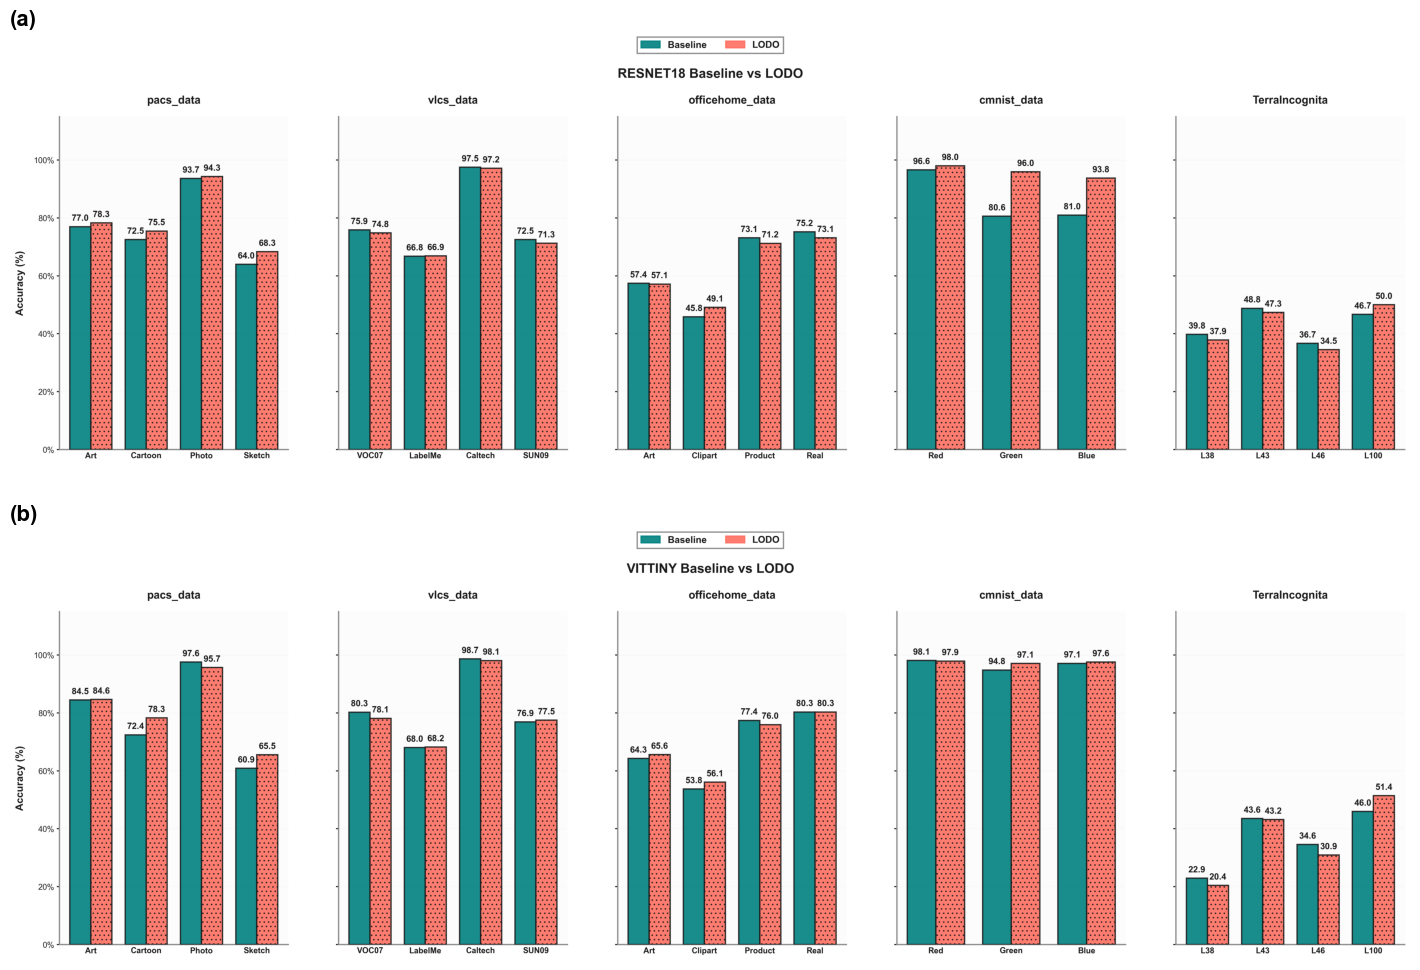

In [17]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pathlib import Path

# Input paths - CHANGE THESE to your actual PNG file paths
image1_path = r"C:\Users\Fatim_Sproj\Desktop\Fatim\Spring 2025\sproj\Visual-Reasoning\Vit-GRQO\plots\resnet18_domain_comparison.png"
image2_path = r"C:\Users\Fatim_Sproj\Desktop\Fatim\Spring 2025\sproj\Visual-Reasoning\Vit-GRQO\plots\vittiny_domain_comparison.png"

# Output directory
out_dir = Path("plots")
out_dir.mkdir(parents=True, exist_ok=True)

# Load images
img1 = mpimg.imread(image1_path)
img2 = mpimg.imread(image2_path)

# Create figure with 2 rows, 1 column - adjust figure height based on images
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Display first image
axes[0].imshow(img1)
axes[0].axis('off')
axes[0].set_title('(a)', fontsize=16, fontweight='bold', loc='left', pad=5)

# Display second image
axes[1].imshow(img2)
axes[1].axis('off')
axes[1].set_title('(b)', fontsize=16, fontweight='bold', loc='left', pad=5)

# CRITICAL: Tight spacing - this actually works
plt.subplots_adjust(hspace=0.02, left=0, right=1, top=0.99, bottom=0.01)
plt.show()
# Save combined figure - DON'T use bbox_inches='tight' as it overrides subplots_adjust
# output_path = out_dir / "combined_figure.png"
# fig.savefig(output_path, dpi=300, facecolor='white')
# plt.close(fig)

# print(f"✓ Combined figure saved: {output_path.resolve()}")